# Problem Set 1

## Yanwei Pan
panyw@uchicago.edu

### Problem 1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

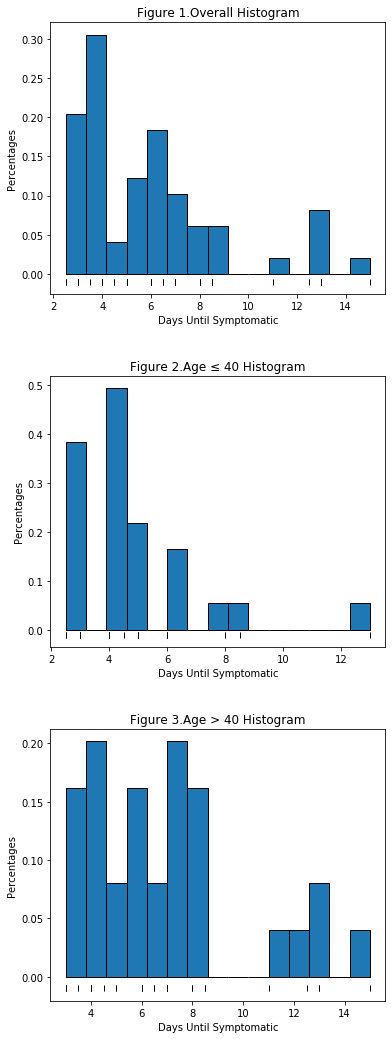

In [21]:
#a
sym_data = pd.read_csv('data/COVIDincubation.txt')
num_bins = 15
data_total = sym_data['symp_days']
data_young = sym_data[sym_data['age'] <= 40]['symp_days']
data_old = sym_data[sym_data['age'] > 40]['symp_days']
data = [(data_total, 'Figure 1.Overall'), (data_young, 'Figure 2.Age ≤ 40'),
        (data_old, 'Figure 3.Age > 40')]

fig, ax = plt.subplots(3, 1, figsize=(6, 18))
fig.subplots_adjust(hspace=0.3)

i = 0
for d,t in data:
    ax[i].hist(d, num_bins, edgecolor='k', density=True)
    ax[i].plot(d, np.full_like(d, -0.01), '|k',
               markeredgewidth=1)
    ax[i].set_xlabel('Days Until Symptomatic')
    ax[i].set_ylabel('Percentages')
    ax[i].set_title('{} Histogram'.format(t))
    i += 1

In [15]:
#b

###optimal bandwidths
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
d = [(data_total, 'Overall'), (data_young, 'Age ≤ 40'),
        (data_old, 'Age > 40')]
results = []
for i, t in d:
    grid.fit(i.values[:, None])
    opt_bandwidth = grid.best_params_['bandwidth']
    results.append((i, opt_bandwidth, t))
    print('The optimal bandwidths of {} sample is '.format(t), opt_bandwidth)

The optimal bandwidths of Overall sample is  0.8910453324821516
The optimal bandwidths of Age ≤ 40 sample is  1.6233824316122782
The optimal bandwidths of Age > 40 sample is  1.1861737164524786


In [19]:
data_total.describe()

count    59.000000
mean      5.838983
std       2.933811
min       2.500000
25%       4.000000
50%       5.000000
75%       7.000000
max      15.000000
Name: symp_days, dtype: float64

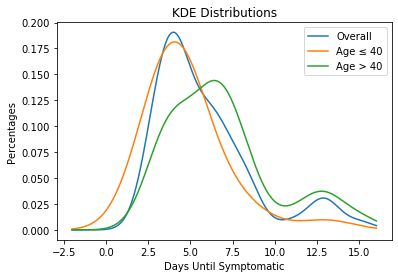

In [44]:
###Plot KDE distributions
x_d = np.linspace(-2, 16, 2000)[:, None]
for i, b, t in results:
    kde = KernelDensity(bandwidth=b, kernel='gaussian')
    kde.fit(i.values[:, None])
    logprob = kde.score_samples(x_d)[:, None]
    plt.plot(x_d, np.exp(logprob), label=t)
plt.xlabel('Days Until Symptomatic')
plt.ylabel('Percentages')
plt.legend()
plt.title('KDE Distributions')
plt.show()

In [45]:
#c

This KDE distribution figure shows that the young are more likely to have a shorter incubation period than the old individuals, which is about 4 days. And young individuals have low probabilities to be symptomatic until 10 days. However, the old individuals have high probabilities to be symptomatic until 7 days and also have relatively high probabilities to be symptomatic until 12 days. Overall, young individuals are more likely to have a shorter incubation period.

### Problem 2

<IPython.core.display.Javascript object>


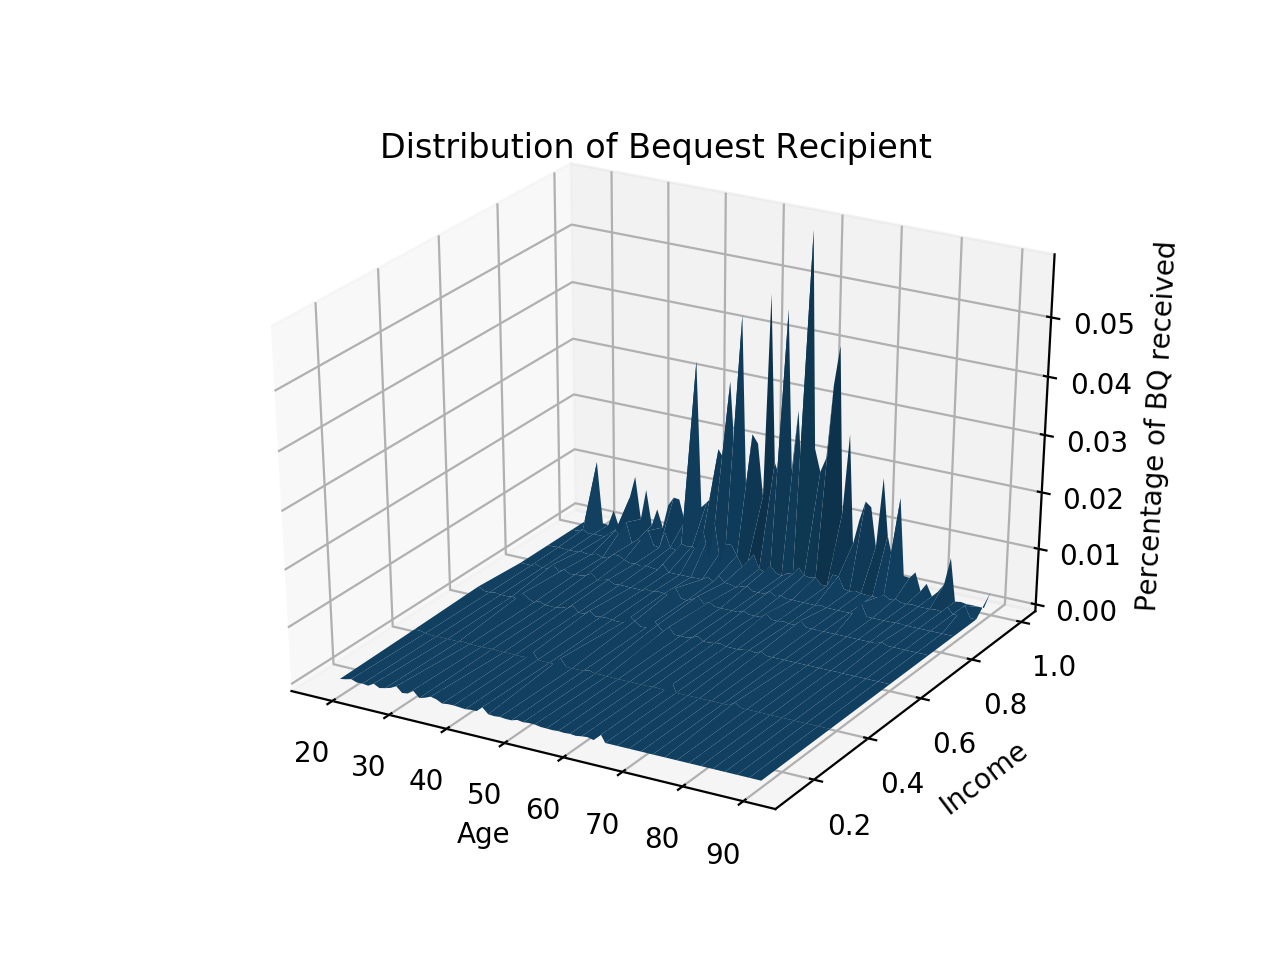

Text(0.5, 0, 'Percentage of BQ received')

In [68]:
#a
%matplotlib notebook
bq_data = np.loadtxt('data/BQ_probmat.txt', delimiter=',')

age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85,
                          0.94, 0.995])
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title('Distribution of Bequest Recipient')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Percentage of BQ received')

In [94]:
#b
bq_ind_df = pd.read_csv('data/BQ_ind_data.txt', delimiter=',')
bq_ind_df.head()

,age,income_pctl
0,18,0.125
1,18,0.125
2,18,0.125
3,18,0.125
4,18,0.125


<IPython.core.display.Javascript object>


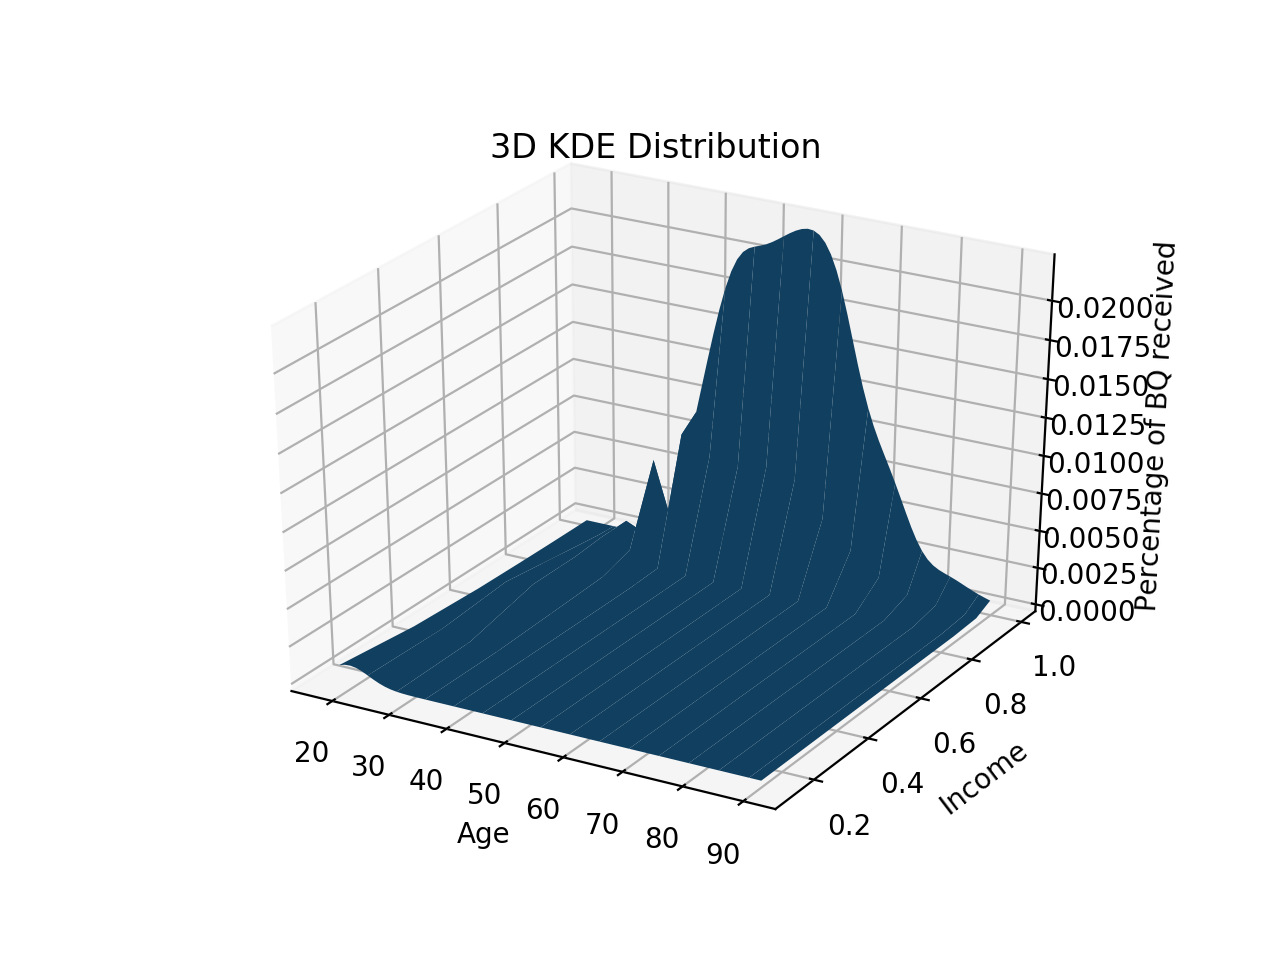

Text(0.5, 0.92, '3D KDE Distribution')

In [92]:
bq_ind_mat = bq_ind_df.values
bandwidth = 0.3
kernel = gaussian_kde(bq_ind_mat.T, bw_method=bandwidth)
coords = np.vstack([item.ravel() for item in [age_mat, income_mat]])

Z = np.reshape(kernel(coords), age_mat.shape)
Z_scaled = Z / float(np.sum(Z))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Percentage of BQ received')
ax.set_title('3D KDE Distribution')

In [93]:
print('The estimated density for bequest recipients who are age 61 in the 6th lifetime income category is', Z_scaled[43,5])

The estimated density for bequest recipients who are age 61 in the 6th lifetime income category is 0.0055445518251070885
